In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

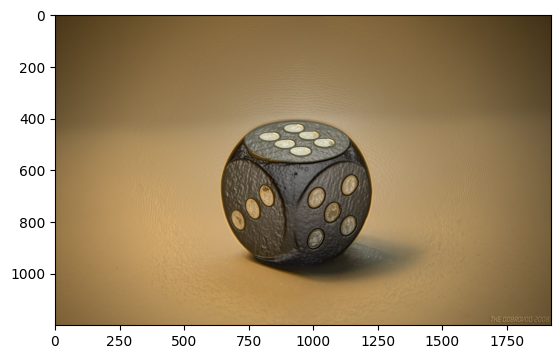

In [2]:
path="1.jpg"
img=cv2.imread(path,cv2.COLOR_BGR2RGB)
#cv2.imshow("image 1",img)
#cv2.waitKey(0); cv2.destroyAllWindows()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
dim=img.shape
half_img = cv2.resize(img, (0, 0), fx = 0.2, fy = 0.2)
dim2=half_img.shape
cv2.imwrite("half_img.jpg",half_img)

True

In [4]:
print(dim)
print(dim2)

(1200, 1920, 3)
(240, 384, 3)


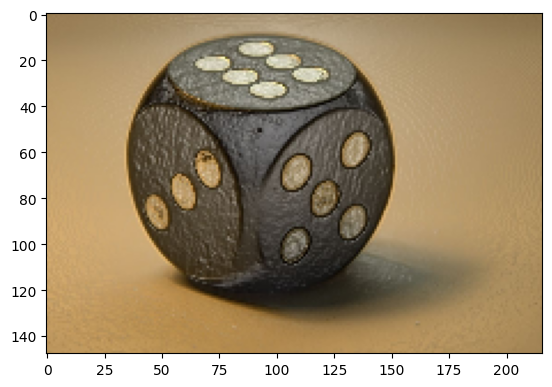

In [5]:
r = cv2.selectROI("select the area",half_img)
 
# Crop image
cropped_image = half_img[int(r[1]):int(r[1]+r[3]),
                      int(r[0]):int(r[0]+r[2])]
 
# Display cropped image
cv2.imshow("Cropped image", cropped_image)
cv2.waitKey(0)
cv2.imwrite("crop_img.jpg",cropped_image)

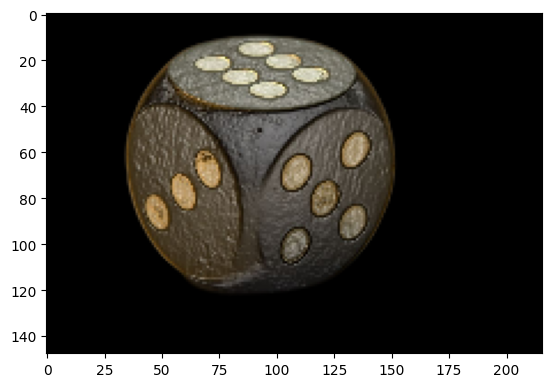

In [6]:
from rembg import remove


input_path = 'crop_img.jpg'
output_path = 'no_bg_img.jpg'
output = remove(cropped_image)
cv2.imwrite(output_path, output)

cv2.imshow('no background image',output)
cv2.waitKey(0)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [7]:
#method 1 to get the perfect outline of the object
gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
_, roi = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
cv2.imwrite('roi.jpg', roi)
cont = cv2.findContours(roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output2 = np.zeros(gray.shape, dtype=np.uint8)
cv2.drawContours(output2, cont[0], -1, (255, 255, 255))


boundary = 255*np.ones(gray.shape, dtype=np.uint8)
boundary[1:boundary.shape[0]-1, 1:boundary.shape[1]-1] = 0

toremove = output2 & boundary
output2 = output2 ^ toremove

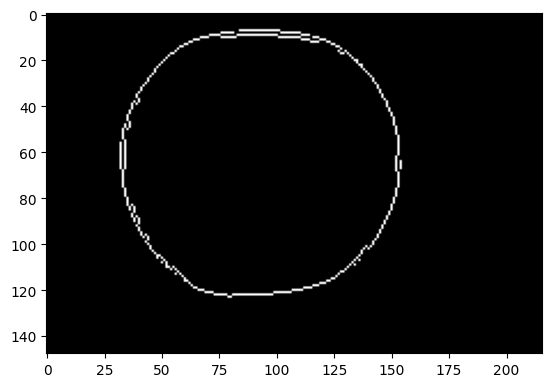

In [8]:
cv2.imshow('image',output2)
cv2.waitKey(0)
cv2.imwrite("outline.jpg",output2)
#output2.show()
plt.imshow(cv2.cvtColor(output2, cv2.COLOR_BGR2RGB))

In [9]:
print(output2)
print(output2.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(148, 216)


In [10]:
#method 2
#drawing the outline for the image

img = cv2.imread('no_bg_img.jpg', cv2.IMREAD_UNCHANGED)
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh = 4
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#finding contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# draw the contours on the cropped image
cv2.drawContours(cropped_image, contours,-1, (0,255,0), 3)
cv2.imwrite('contours.jpg',cropped_image) 

cv2.imshow('contour image',cropped_image)
cv2.waitKey(0)

-1

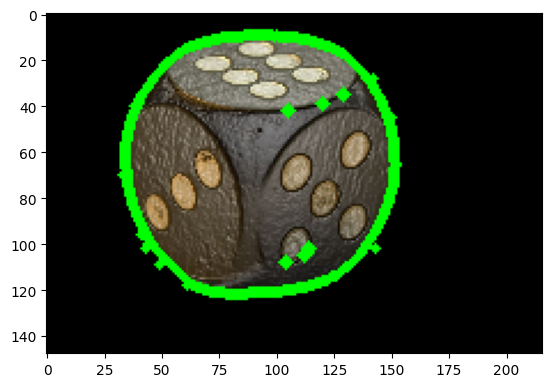

In [11]:
#showing object with ouutline
cv2.drawContours(output, contours,-1, (0,255,0), 3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [12]:
#superimposition
from PIL import Image
import cv2
img = Image.open(r"C:\Users\ladij\Documents\vscode_jupyter\questions\half_img.jpg")
bg = Image.open(r"C:\Users\ladij\Documents\vscode_jupyter\questions\contours.jpg")
  

img.paste(bg, (90,70))
img.save("final_img.jpg")
 
#img.show()

final_img=cv2.imread("final_img.jpg",cv2.COLOR_BGR2RGB)
cv2.imshow('final image',final_img)
#cv2.waitKey(0)

k = cv2.waitKey(0)
if k == ord('b'):
    cv2.waitKey(0)
    cv2.imshow('other image',half_img)


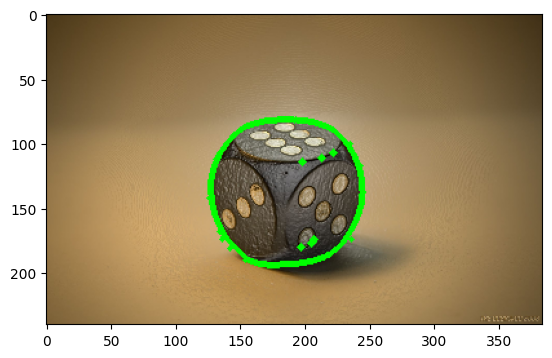

In [13]:
#final output 
plt.imshow(cv2.cvtColor(half_img, cv2.COLOR_BGR2RGB))